In [1]:
from PIL import Image
import glob
import os
import numpy as np
import random
import functools as ft
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
total = np.zeros((1024,1)) #setting initial conditions
total_array = np.zeros((1024,1)) #setting initial conditions  #This cell is mainly setting up for PCA. We are trying to extract
total_array_test = np.zeros((1024,1))                         #the images and converting it to array. We are also trying to set up
count = 0 #count as a checker for iteration                   #total_array and total_array_test as training set and test set 
count_test = 0                                                #respectively
DIR = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\PIE')
y_train = np.array([])
y_test = np.array([])
#print(np.arange(1,69))
for i in np.arange(1,25):
    path = os.path.join(DIR, str(i)) #get all the available 68 subjects
    dirs = os.listdir(path)
    random.shuffle(dirs)
    for item in dirs[0:20]:
    
        image = Image.open(os.path.join(path, str(item)))
        image_array = np.array(image)
        image_array = image_array / 255
        #print(image_array.max())
        #print(image_array.min())
        image_array_reshaped = image_array.reshape((1024,1))
        total += image_array_reshaped
        count += 1
        y_train = np.append(y_train,[i], axis = 0)
        if count == 1:
            total_array = total
        
        else:
            total_array = np.append(total_array,image_array_reshaped, axis = 1)
    for item in dirs[20:71]:
    
        image = Image.open(os.path.join(path, str(item)))
        image_array = np.array(image) 
        image_array = image_array / 255
        image_array_reshaped = image_array.reshape((1024,1))
        #total += image_array_reshaped
        count_test += 1
        y_test = np.append(y_test,[i], axis = 0)
        if count_test == 1:
            total_array_test = image_array_reshaped        
        else:
            total_array_test = np.append(total_array_test,image_array_reshaped, axis = 1)

path = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\PIE\25')
dirs = os.listdir(path)
random.shuffle(dirs)

for item in dirs[0:13]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image) 
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    total += image_array_reshaped
    count += 1
    y_train = np.append(y_train,[25], axis = 0)
    total_array = np.append(total_array,image_array_reshaped, axis = 1)
    
for item in dirs[13:64]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image) 
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    #total += image_array_reshaped
    count_test += 1
    y_test = np.append(y_test,[25], axis = 0)
    total_array_test = np.append(total_array_test,image_array_reshaped, axis = 1)
    
path = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\Yidi\Yidi_Grey')
dirs = os.listdir(path)
random.shuffle(dirs)

for item in dirs[0:7]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image) 
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    total += image_array_reshaped
    count += 1
    y_train = np.append(y_train,[26], axis = 0)
    total_array = np.append(total_array,image_array_reshaped, axis = 1)
    
for item in dirs[7:]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image)
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    count_test += 1
    y_test = np.append(y_test,[26], axis = 0)
    total_array_test = np.append(total_array_test,image_array_reshaped, axis = 1)
    #total_selfie += image_array_reshaped
    
print(len(total))
avg = total / 500
print(avg)
print(len(avg))

1024
[[0.1552549 ]
 [0.17126275]
 [0.19070588]
 ...
 [0.20167843]
 [0.21287059]
 [0.22247843]]
1024


In [3]:
SS = np.zeros((1024,1024))
for i in range(500):
    minus_avg = np.subtract(total_array, avg).transpose()[i]
    no_transpose = np.reshape(minus_avg, (-1, 1))
    transp = np.reshape(minus_avg, (-1, 1)).transpose()
    matrix_mul = np.dot(no_transpose, transp)
    SS += matrix_mul                                          #Compute SS
    
SS = SS / 500
u, s, vh = np.linalg.svd(SS, full_matrices=True)              #Perform SVD on SS in order to extract out the eigenvectors
s_reshape = np.reshape(s, (-1, 1))
concatenated_vh = np.concatenate((vh,s_reshape),axis=1)
sorted_concatenated_vh = concatenated_vh[concatenated_vh[:, -1].argsort()] #sorting out the eigenvectors
print(sorted_concatenated_vh)
print(sorted_concatenated_vh.shape)

[[-5.87933128e-01  1.35961827e-01  8.43690586e-03 ... -3.06766688e-02
   3.26229927e-02  1.22715573e-15]
 [ 0.00000000e+00 -3.37129872e-03 -2.89722055e-03 ... -2.79314587e-02
  -6.42290509e-03  1.34539828e-15]
 [ 0.00000000e+00 -2.73451621e-03  1.23110016e-03 ... -1.15242869e-02
   1.92693036e-02  1.34539828e-15]
 ...
 [-2.33267380e-02 -2.50222354e-02 -2.71694106e-02 ... -8.26765568e-02
  -8.77474294e-02  2.90308931e+00]
 [-1.59629448e-02 -2.12317564e-02 -2.61261467e-02 ...  2.41872625e-02
   2.15623092e-02  1.12587755e+01]
 [-1.12715876e-02 -1.50675223e-02 -1.77528599e-02 ... -1.46187563e-02
  -1.48838389e-02  1.74619542e+01]]
(1024, 1025)


<IPython.core.display.Javascript object>


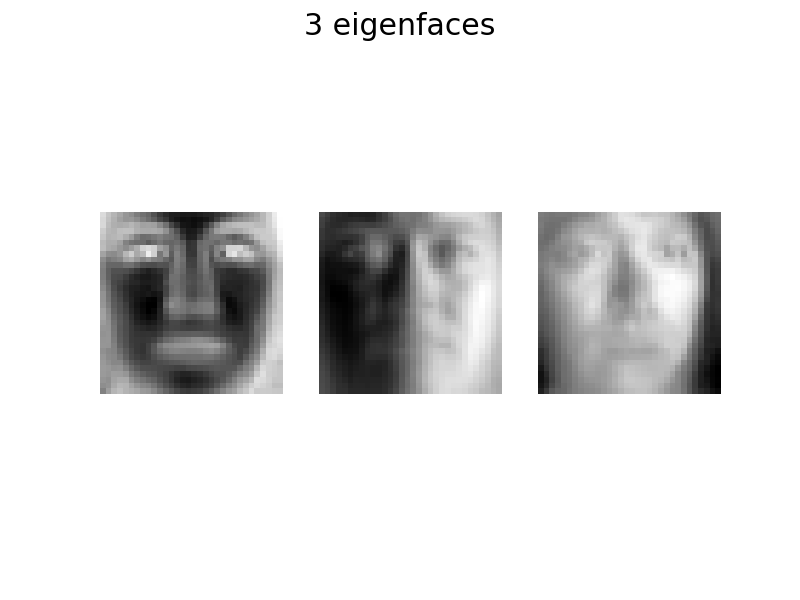

(-0.5, 31.5, 31.5, -0.5)

In [4]:
first_principal_component = sorted_concatenated_vh[:, 0:1024][-3:][::-1][-3].reshape((1024,1))
second_principal_component = sorted_concatenated_vh[:, 0:1024][-3:][::-1][-2].reshape((1024,1))
third_principal_component = sorted_concatenated_vh[:, 0:1024][-3:][::-1][-1].reshape((1024,1))

fig, axs= plt.subplots(1, 3)
fig.suptitle('3 eigenfaces', fontsize='xx-large')
axs[0].imshow(first_principal_component.reshape((32,32)), 'gray') #these codes below are converting the eigenvectors back to the
axs[0].axis('off')                                                #image format before showing the eigenfaces for the report
axs[1].imshow(second_principal_component.reshape((32,32)), 'gray')
axs[1].axis('off')
axs[2].imshow(third_principal_component.reshape((32,32)), 'gray')
axs[2].axis('off')

<IPython.core.display.Javascript object>


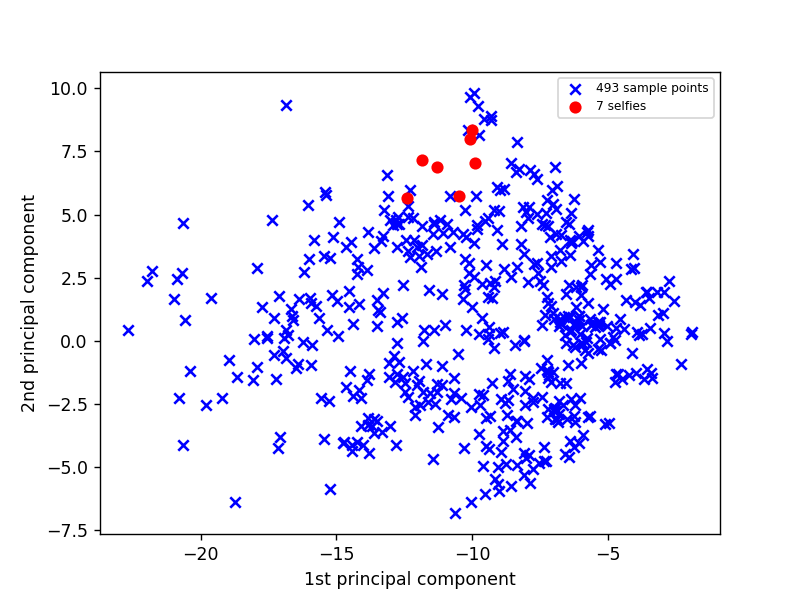

In [5]:
finalized_component = sorted_concatenated_vh[:, 0:1024][-2:][::-1].transpose()
transformed_data = np.dot(total_array.transpose(), finalized_component)
#print(transformed_data.shape)
X = transformed_data.transpose()[0][0:493]  #drawing the 2d plot for CMU PIE dataset and selfie respectively. Mainly extracting 
Y = transformed_data.transpose()[1][0:493]  #out the points for X, Y(CMU PIE dataset) and X1, Y1(selfie dataset)
X1 = transformed_data.transpose()[0][-7:]
Y1 = transformed_data.transpose()[1][-7:]
plt.scatter(X,Y, c = 'b', marker='x', label = '493 sample points')
plt.scatter(X1,Y1, c = 'r', marker='o', label = '7 selfies')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend(prop={"size":7}) #legend to distinguish the points for CMU PIE dataset and selfie dataset
plt.show()

<IPython.core.display.Javascript object>


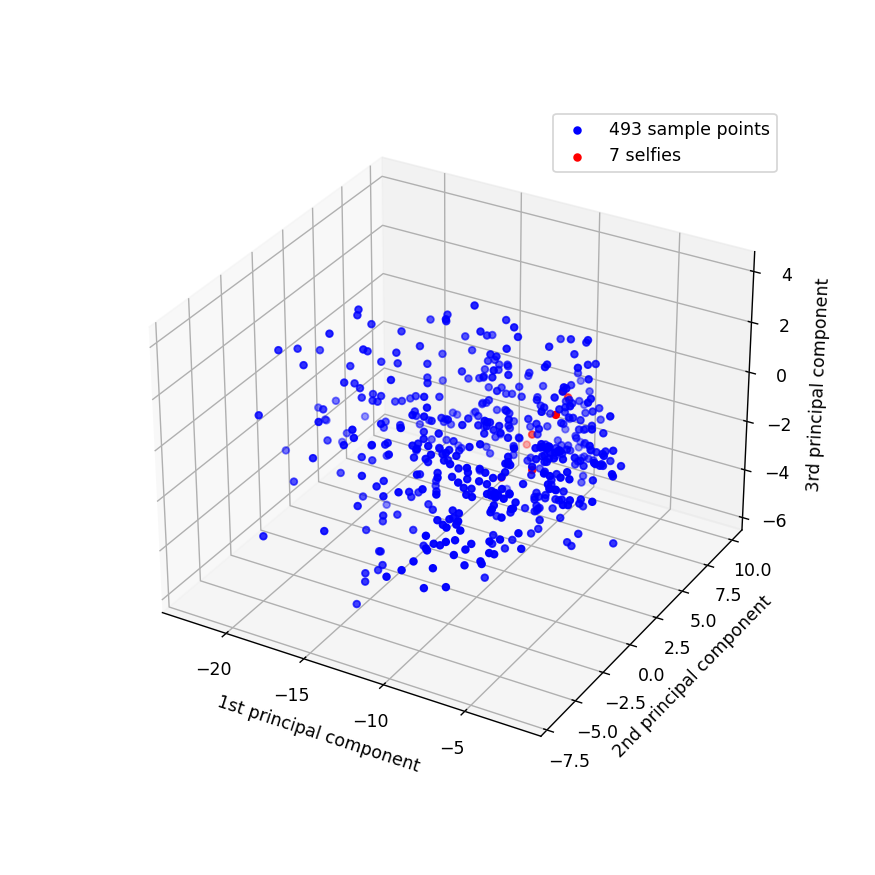

In [6]:
finalized_component = sorted_concatenated_vh[:, 0:1024][-3:][::-1].transpose()
transformed_data = np.dot(total_array.transpose(), finalized_component)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection = '3d')
X = transformed_data.transpose()[0][0:493]
Y = transformed_data.transpose()[1][0:493]
Z = transformed_data.transpose()[2][0:493]  #doing the same thing as the above cell just that now this is plotting 3d plots 
X1 = transformed_data.transpose()[0][-7:]   #instead of 2d plot
Y1 = transformed_data.transpose()[1][-7:]
Z1 = transformed_data.transpose()[2][-7:]
ax.scatter(X,Y,Z, c = 'b', marker='o', label = '493 sample points', s=15)
ax.scatter(X1,Y1,Z1, c = 'r', marker='o', label = '7 selfies', s=15)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')


plt.legend(prop={"size":10})
#plt.legend(fontsize=15)
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

dimension_list = [40, 80, 200]
C_list = [0.01, 0.1, 1]
for item in dimension_list: #for this iteration, we are trying to perform KNN and SVM simultaneously. Readers can look at the
    finalized_component = sorted_concatenated_vh[:, 0:1024][-item:][::-1].transpose() #output of the cell to see what does this
    transformed_data_test = np.dot(total_array_test.transpose(), finalized_component)[0:1275] #piece of code do.
    transformed_data = np.dot(total_array.transpose(), finalized_component)[0:493]
    transformed_data_selfie_test = np.dot(total_array_test.transpose(), finalized_component)[-3:]
    transformed_data_selfie = np.dot(total_array.transpose(), finalized_component)[-7:]
    transformed_data_total = np.dot(total_array.transpose(), finalized_component)
    transformed_data_test_total = np.dot(total_array_test.transpose(), finalized_component)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(transformed_data_total, y_train)
    print('CMU PIE Accuracy: ' + str(accuracy_score(y_test[:-3], knn.predict(transformed_data_test))))
    print('Selfie Accuracy: ' + str(accuracy_score(y_test[-3:], knn.predict(transformed_data_selfie_test))))
    for item1 in C_list:
        model_linear_kernal = SVC(kernel='linear', C = item1, random_state = 0, max_iter = 10000)
        model_linear_kernal.fit(transformed_data_total, y_train)
        cv = ShuffleSplit(n_splits=20, test_size = 0.4, random_state=0)
        clf = make_pipeline(preprocessing.StandardScaler(), model_linear_kernal) #performing SVM with cross validation so as to
        avg_SVM_score = np.average(cross_val_score(clf, transformed_data_test_total, y_test, cv=cv)) #get better result
        print('C = '+str(item1)+' (Dimension of '+str(item)+') Accuracy: '+str(avg_SVM_score))
        #np.average(cross_val_score(clf, SVM_combined_Xtest, SVM_combined_Ytest.flatten(), cv=cv))

CMU PIE Accuracy: 0.516078431372549
Selfie Accuracy: 1.0
C = 0.01 (Dimension of 40) Accuracy: 0.800390625
C = 0.1 (Dimension of 40) Accuracy: 0.90859375
C = 1 (Dimension of 40) Accuracy: 0.90732421875
CMU PIE Accuracy: 0.5474509803921569
Selfie Accuracy: 1.0
C = 0.01 (Dimension of 80) Accuracy: 0.89091796875
C = 0.1 (Dimension of 80) Accuracy: 0.92587890625
C = 1 (Dimension of 80) Accuracy: 0.9255859375
CMU PIE Accuracy: 0.5631372549019608
Selfie Accuracy: 1.0
C = 0.01 (Dimension of 200) Accuracy: 0.90947265625
C = 0.1 (Dimension of 200) Accuracy: 0.91259765625
C = 1 (Dimension of 200) Accuracy: 0.91259765625


In [8]:
for item1 in C_list:
    model_linear_kernal = SVC(kernel='linear', C = item1, random_state = 0, max_iter = 10000)
    model_linear_kernal.fit(total_array.transpose(), y_train) #this cell is implementing SVM for raw faces
    cv = ShuffleSplit(n_splits=20, test_size = 0.4, random_state=0)
    clf = make_pipeline(preprocessing.StandardScaler(), model_linear_kernal)
    avg_SVM_score = np.average(cross_val_score(clf, total_array_test.transpose(), y_test, cv=cv))
    print('C = '+str(item1)+' Accuracy: '+str(avg_SVM_score))

C = 0.01 Accuracy: 0.9267578125
C = 0.1 Accuracy: 0.93525390625
C = 1 Accuracy: 0.93525390625


<IPython.core.display.Javascript object>


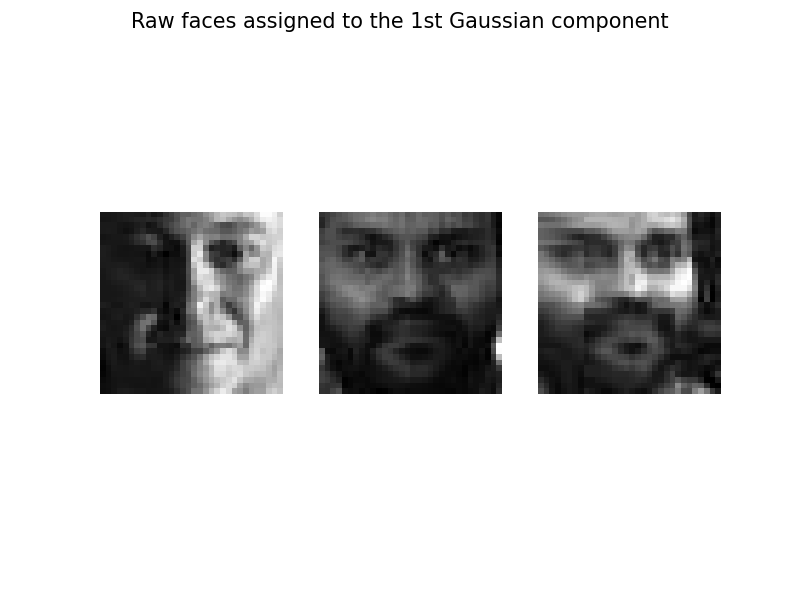

<IPython.core.display.Javascript object>


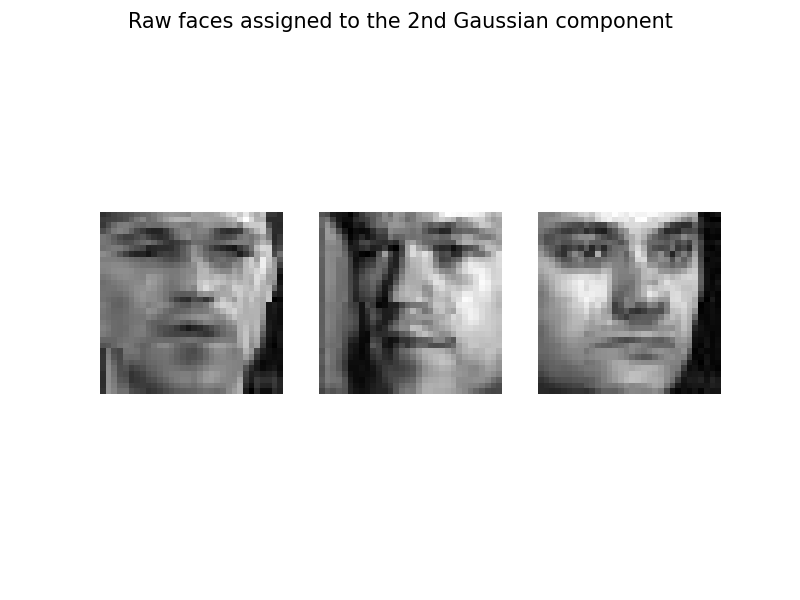

<IPython.core.display.Javascript object>


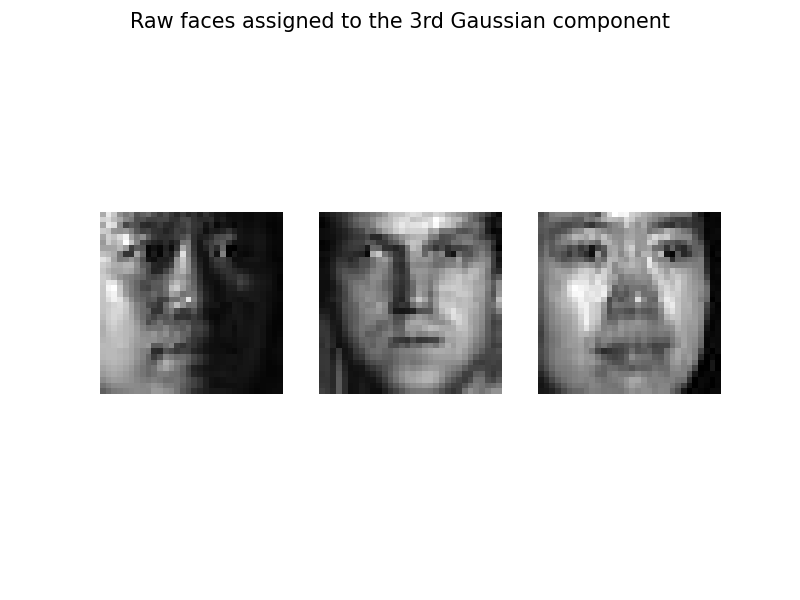

In [9]:
EM = GaussianMixture(n_components=3) #this cell is performing GMM(3 components) for raw faces. Reader can look at the output of
EM.fit(total_array.transpose())      #the cell to see what the codes do.
cluster = EM.predict(total_array.transpose())
#line1 = np.random.choice(total_array.transpose()[cluster==0].shape[0], 3, replace=False)
#line2 = np.random.choice(total_array.transpose()[cluster==1].shape[0], 3, replace=False)
#print(line1)
#labels = ['Raw faces','Dimensionality of 80','Dimensionality of 200']
numbers = ['1st','2nd','3rd']
for j in range(3):
    line1 = np.random.choice(total_array.transpose()[cluster==j].shape[0], 3, replace=False)
    fig, axs= plt.subplots(1, 3)
    fig.suptitle('Raw faces assigned to the ' + numbers[j] + ' Gaussian component')
    for i in range(3):
        axs[i].imshow(total_array.transpose()[line1[i], :].reshape((32, 32)), 'gray')
        axs[i].axis('off')

<IPython.core.display.Javascript object>


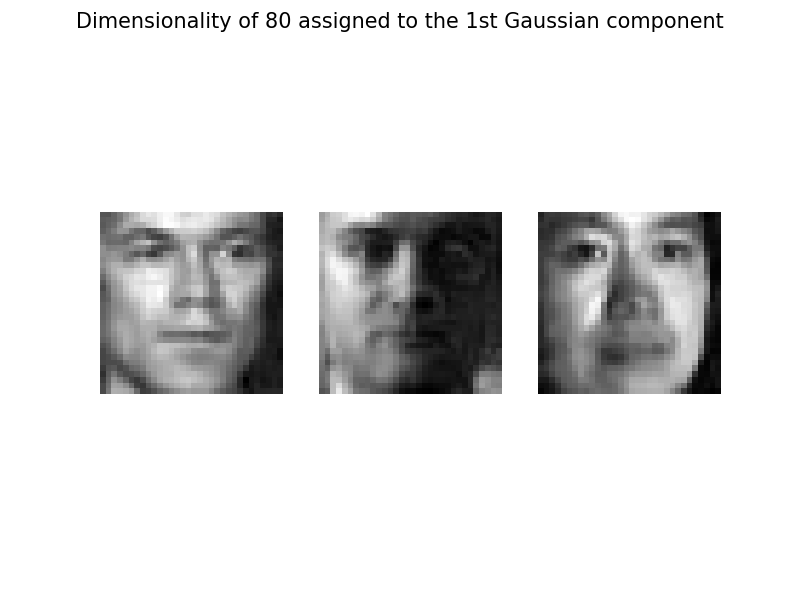

<IPython.core.display.Javascript object>


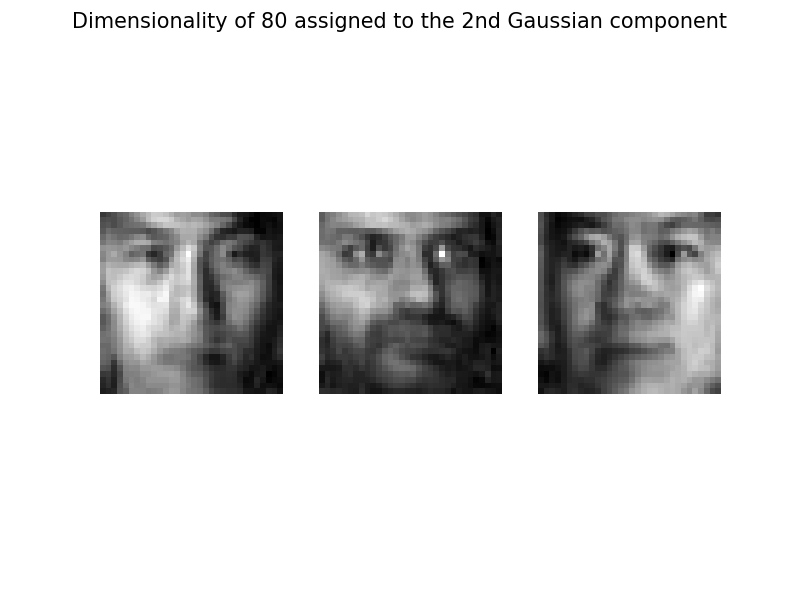

<IPython.core.display.Javascript object>


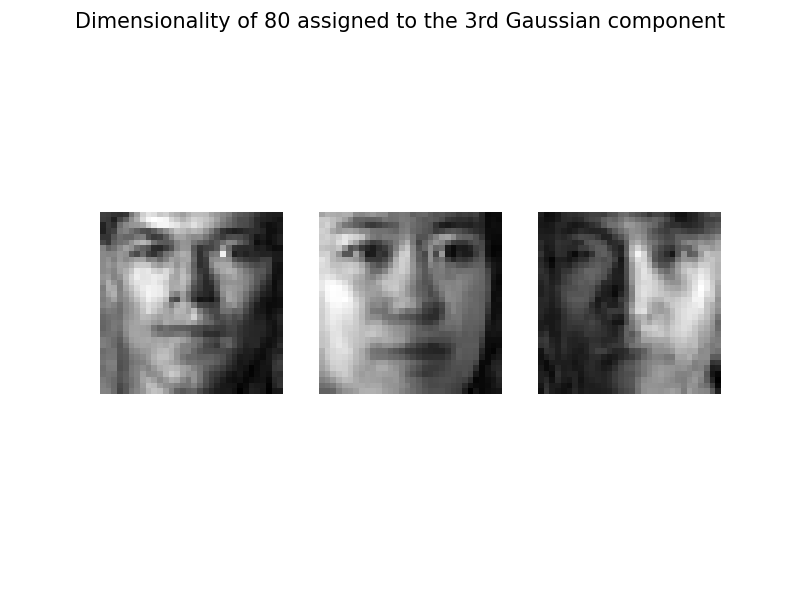

In [10]:
finalized_component = sorted_concatenated_vh[:, 0:1024][-80:][::-1].transpose()
transformed_data_total = np.dot(total_array.transpose(), finalized_component)
EM = GaussianMixture(n_components=3) #from this cell below, they are mainly performing GMM for dimensionality of 80 and 200
EM.fit(transformed_data_total)       #respectively. Just that the images are reconstructed for their respective dimensions. 
cluster = EM.predict(transformed_data_total) #Reduced dimensionality images are based on specific Mathematical formulas which are
numbers = ['1st','2nd','3rd'] #given in the lecture.
for j in range(3):
    line1 = np.random.choice(total_array.transpose()[cluster==j].shape[0], 3, replace=False)
    fig, axs= plt.subplots(1, 3)
    fig.suptitle('Dimensionality of 80 assigned to the ' + numbers[j] + ' Gaussian component')
    for i in range(3):
        #total_array.transpose()[line1[i], :].reshape((1024, 1))
        u_selfie_conc_t = sorted_concatenated_vh[:, 0:1024][-80:][::-1]
        u_selfie_conc = sorted_concatenated_vh[:, 0:1024][-80:][::-1].transpose()
        minus_avg = np.subtract(total_array.transpose()[line1[i], :].reshape((1024, 1)), avg)
        reduced_dimensionality = ft.reduce(np.dot,[u_selfie_conc,u_selfie_conc_t,minus_avg]) + avg
        axs[i].imshow(reduced_dimensionality.reshape((32, 32)), 'gray')
        axs[i].axis('off')

<IPython.core.display.Javascript object>


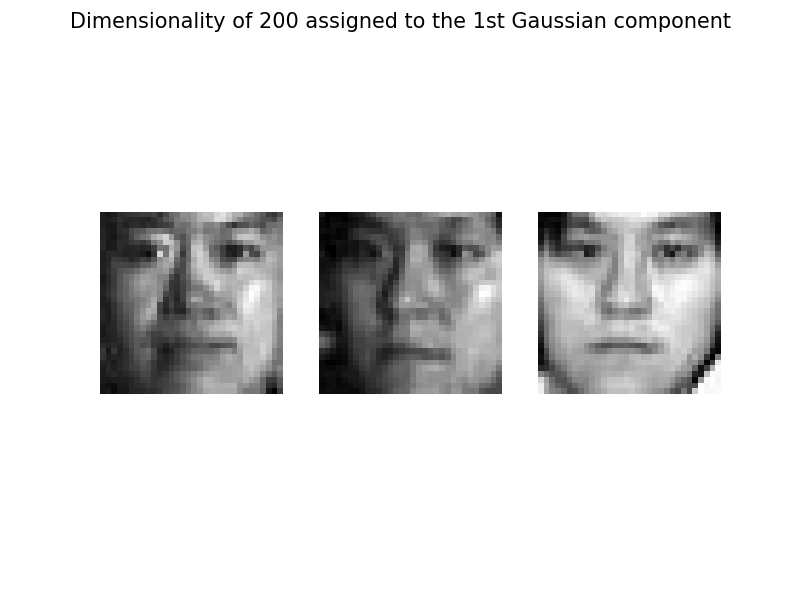

<IPython.core.display.Javascript object>


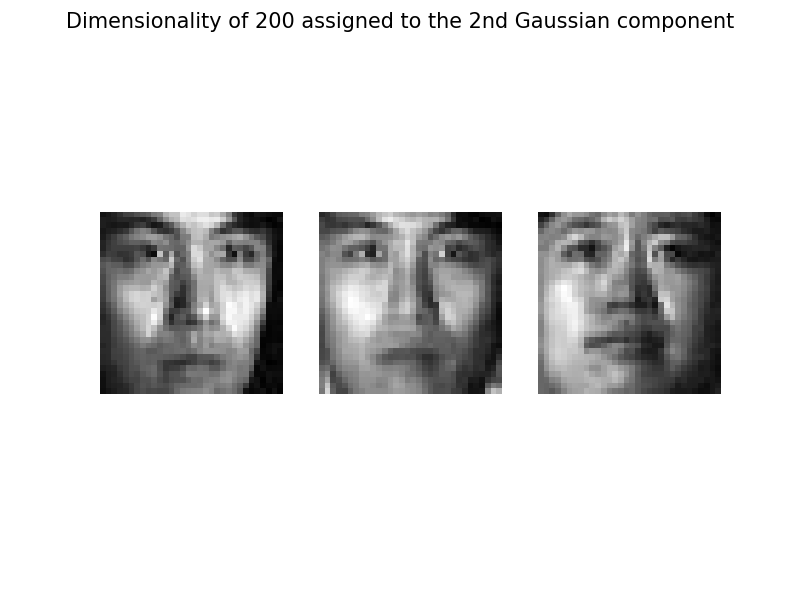

<IPython.core.display.Javascript object>


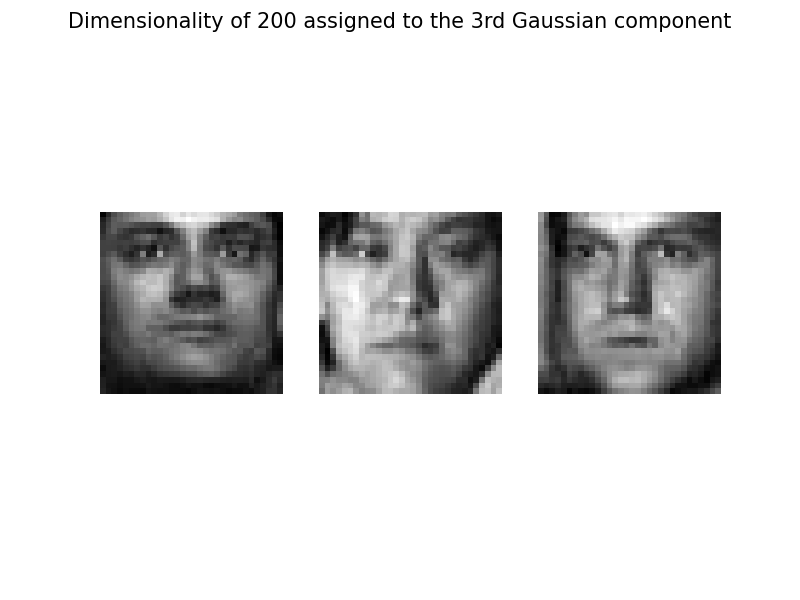

In [11]:
finalized_component = sorted_concatenated_vh[:, 0:1024][-200:][::-1].transpose()
transformed_data_total = np.dot(total_array.transpose(), finalized_component)
EM = GaussianMixture(n_components=3)
EM.fit(transformed_data_total)
cluster = EM.predict(transformed_data_total)
numbers = ['1st','2nd','3rd']
for j in range(3):
    line1 = np.random.choice(total_array.transpose()[cluster==j].shape[0], 3, replace=False)
    fig, axs= plt.subplots(1, 3)
    fig.suptitle('Dimensionality of 200 assigned to the ' + numbers[j] + ' Gaussian component')
    for i in range(3):
        #total_array.transpose()[line1[i], :].reshape((1024, 1))
        u_selfie_conc_t = sorted_concatenated_vh[:, 0:1024][-200:][::-1]
        u_selfie_conc = sorted_concatenated_vh[:, 0:1024][-200:][::-1].transpose()
        minus_avg = np.subtract(total_array.transpose()[line1[i], :].reshape((1024, 1)), avg)
        reduced_dimensionality = ft.reduce(np.dot,[u_selfie_conc,u_selfie_conc_t,minus_avg]) + avg
        axs[i].imshow(reduced_dimensionality.reshape((32, 32)), 'gray')
        axs[i].axis('off')

In [43]:
finalized_component = sorted_concatenated_vh[:, 0:1024][-40:][::-1].transpose() #change these dimensions
transformed_data_test = np.dot(total_array_test.transpose(), finalized_component)[0:1275] #this cell is draft codes. Can ignore. 
transformed_data = np.dot(total_array.transpose(), finalized_component)[0:493]
transformed_data_selfie_test = np.dot(total_array_test.transpose(), finalized_component)[-3:]
transformed_data_selfie = np.dot(total_array.transpose(), finalized_component)[-7:]
transformed_data_total = np.dot(total_array.transpose(), finalized_component)
transformed_data_test_total = np.dot(total_array_test.transpose(), finalized_component)
print(transformed_data_test.shape)
print(transformed_data.shape)
print(transformed_data_selfie_test.shape)
print(transformed_data_selfie.shape)
print(transformed_data_total.shape)
print(transformed_data_test_total.shape)

(1275, 40)
(493, 40)
(3, 40)
(7, 40)
(500, 40)
(1278, 40)


In [35]:
knn = KNeighborsClassifier(n_neighbors=1) #this cell is draft codes. Can ignore
print(y_train)
print(len(y_train))
print(y_test)
print(len(y_test))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 13. 13